## This script contains the following points:

### Importing Data & Libraries
### Subsetting,wrangling, and cleaning time-series data
### Time series analysis: decomposition
### Testing for stationarity
### Stationarizing the Data

## Bonus Task Forecasting

## Importing Data & Libraries

In [44]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm            # Using .api imports the public access version of statsmodels, which is a library that handles

# statistical models.
import os
import warnings                         # This is a library that handles warnings.

warnings.filterwarnings("ignore")       # Disable deprecation warnings that could indicate, for instance, a suspended library or 

                                        # feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight')        # This is a styling option for how your plots will appear. More examples here:

# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [45]:
!pip install nasdaq-data-link

In [46]:
import nasdaqdatalink

In [47]:
# Configure API key 

nasdaqdatalink.ApiConfig.api_key = 'zq11TYJgEMtj-D5dpGyg'

In [48]:
# Importing the IMF Cross Country Macroeconomic Statistics Data "Germany's GDP per Capita at Current Prices, USD" variable.

data = nasdaqdatalink.get_table('QDL/ODA', indicator='DEU_NGDPDPC')

In [49]:
data.head(5)

indicator       date      value
None                                   
0     DEU_NGDPDPC 2028-12-31  60260.392
1     DEU_NGDPDPC 2027-12-31  59052.929
2     DEU_NGDPDPC 2026-12-31  57519.918
3     DEU_NGDPDPC 2025-12-31  55261.563
4     DEU_NGDPDPC 2024-12-31  53006.844

In [50]:
data.shape

(49, 3)

In [51]:
data = data.drop(columns = ['indicator'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    49 non-null     datetime64[ns]
 1   value   49 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 916.0 bytes


## Subsetting, wrangling, and cleaning time-series data

In [53]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [54]:
data_2.head(50)

None       date      value
0      0 2028-12-31  60260.392
1      1 2027-12-31  59052.929
2      2 2026-12-31  57519.918
3      3 2025-12-31  55261.563
4      4 2024-12-31  53006.844
5      5 2023-12-31  51383.504
6      6 2022-12-31  48636.030
7      7 2021-12-31  51237.643
8      8 2020-12-31  46735.314
9      9 2019-12-31  46798.830
10    10 2018-12-31  47961.036
11    11 2017-12-31  44636.833
12    12 2016-12-31  42124.196
13    13 2015-12-31  41107.222
14    14 2014-12-31  48035.802
15    15 2013-12-31  46299.371
16    16 2012-12-31  43883.393
17    17 2011-12-31  46697.376
18    18 2010-12-31  42379.710
19    19 2009-12-31  42338.713
20    20 2008-12-31  46367.859
21    21 2007-12-31  42299.862
22    22 2006-12-31  36894.468
23    23 2005-12-31  35020.197
24    24 2004-12-31  34534.814
25    25 2003-12-31  30668.849
26    26 2002-12-31  25460.334
27    27 2001-12-31  23869.773
28    28 2000-12-31  23924.876
29    29 1999-12-31  26984.243
30    30 1998-12-31  27528.158
31    31 1997-12-31  27170.747
32    32 1996-12-31  30664.299
33    33 1995-12-31  31829.610
34    34 1994-12-31  27233.549
35    35 1993-12-31  25602.961
36    36 1992-12-31  26538.043
37    37 1991-12-31  23453.063
38    38 1990-12-31  20249.138
39    39 1989-12-31  16232.121
40    40 1988-12-31  16514.654
41    41 1987-12-31  15411.529
42    42 1986-12-31  12387.010
43    43 1985-12-31   8678.853
44    44 1984-12-31   8537.765
45    45 1983-12-31   9025.206
46    46 1982-12-31   9014.978
47    47 1981-12-31   9329.591
48    48 1980-12-31  11109.741

In [55]:
data_2.columns

Index(['None', 'date', 'value'], dtype='object')

In [56]:
data_2 = data_2.drop(columns = ['None'])

In [99]:
# creating a subset

data_sub = data_2.loc[(data_2['date'] >= '1990-12-31') & (data_2['date'] < '2024-12-31')]

i chose the more current date data in the subset. data before 1990 is irrelevant. and took out the dates exceeding current time as well

In [100]:
# Set the "date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date'])         # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime')                       # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True)                   # Drop the "Date" column.
data_sub.head()

value
datetime             
2023-12-31  51383.504
2022-12-31  48636.030
2021-12-31  51237.643
2020-12-31  46735.314
2019-12-31  46798.830

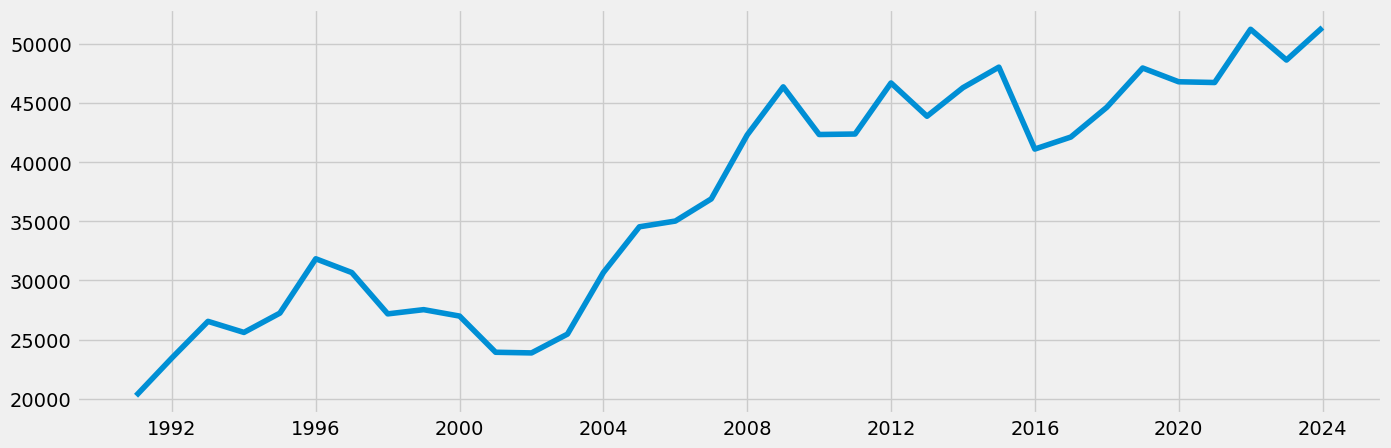

In [101]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)     # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub)

In [102]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

value    0
dtype: int64

In [103]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

## Time-series analysis: decomposition

In [104]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [105]:
from pylab import rcParams                # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

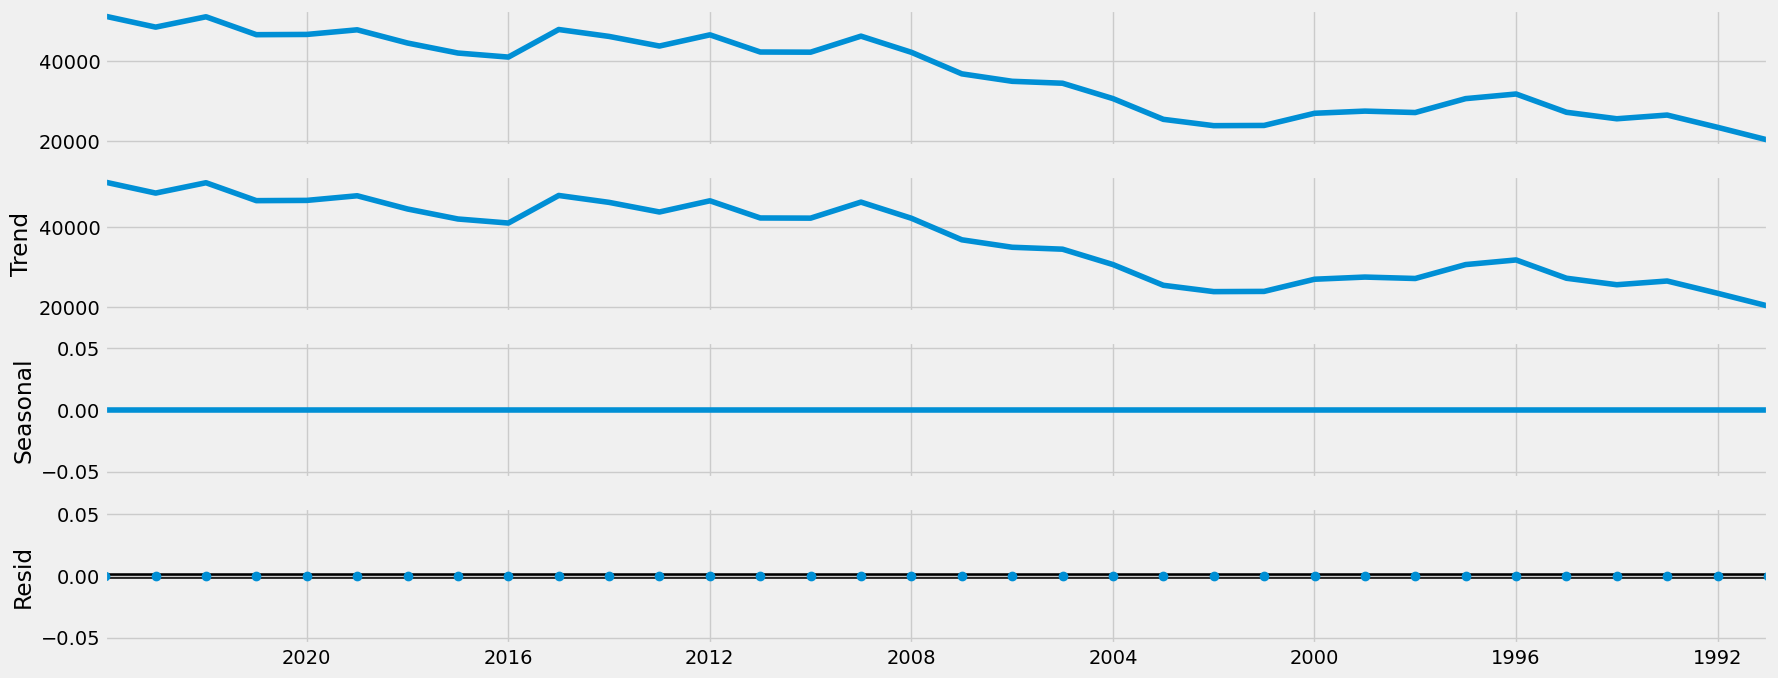

In [106]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Our data follows linear path, as suggested we used additive model to decompose the data.
#### in our chart we can see that level and trend appear the same, meaning our data doesn't have much noise.
#### The trend in the chart gradually rises in a linear fashion.and we don't see any seasonality.

## Testing for stationarity

In [107]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller            # Import the adfuller() function

def dickey_fuller(timeseries):                            # Define the function
    
    # Perform the Dickey-Fuller test:
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.254900
p-value                         0.975178
Number of Lags Used             8.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


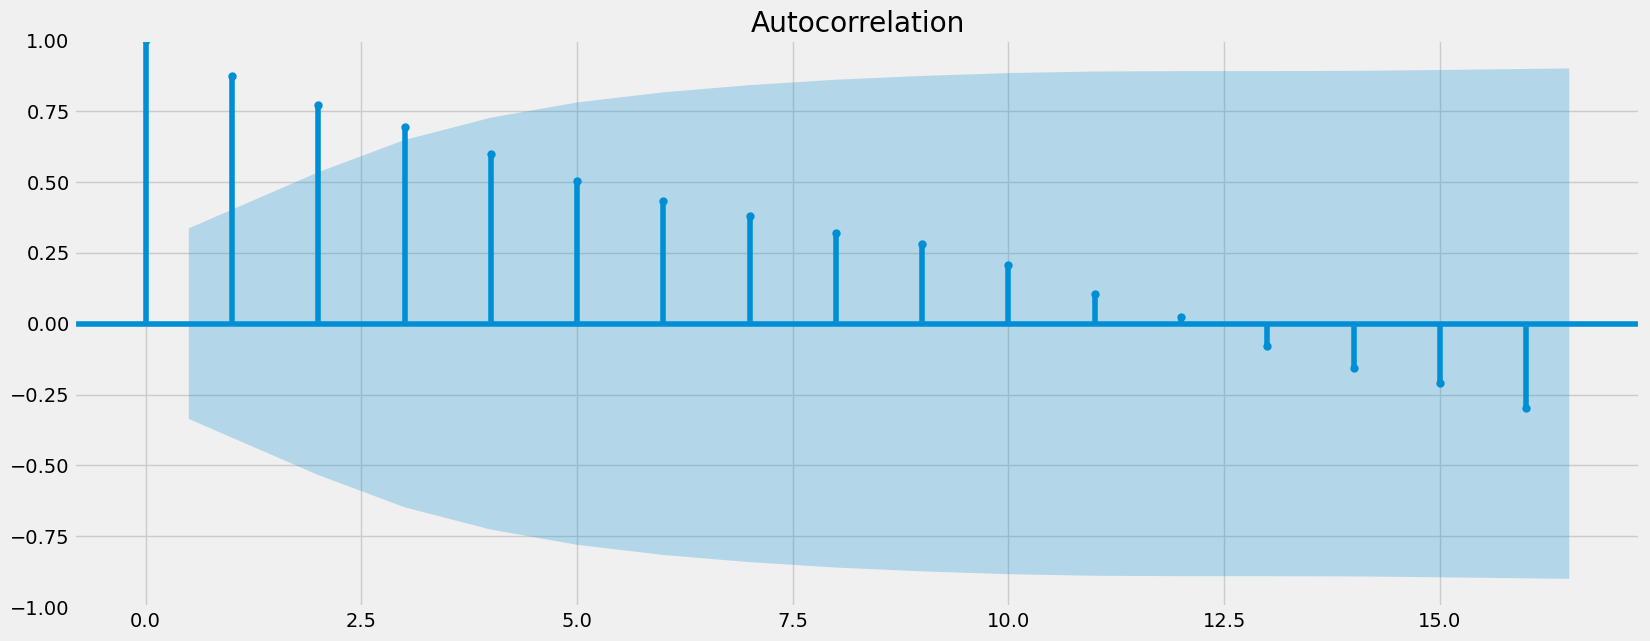

In [108]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### in our first Dickey-Fuller stationary test our Test statistic is larger than the critical value, there for data is non-stationary

## Stationarizing the IMF Cross Country Macroeconomic Statistics Data

In [109]:
data_diff = data_sub - data_sub.shift(1)               # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [110]:
data_diff.dropna(inplace = True)                       # Here, you remove the missing values that came about as a result of the differencing. 

# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [111]:
data_diff.head()

value
datetime            
2022-12-31 -2747.474
2021-12-31  2601.613
2020-12-31 -4502.329
2019-12-31    63.516
2018-12-31  1162.206

In [112]:
data_diff.columns

Index(['value'], dtype='object')

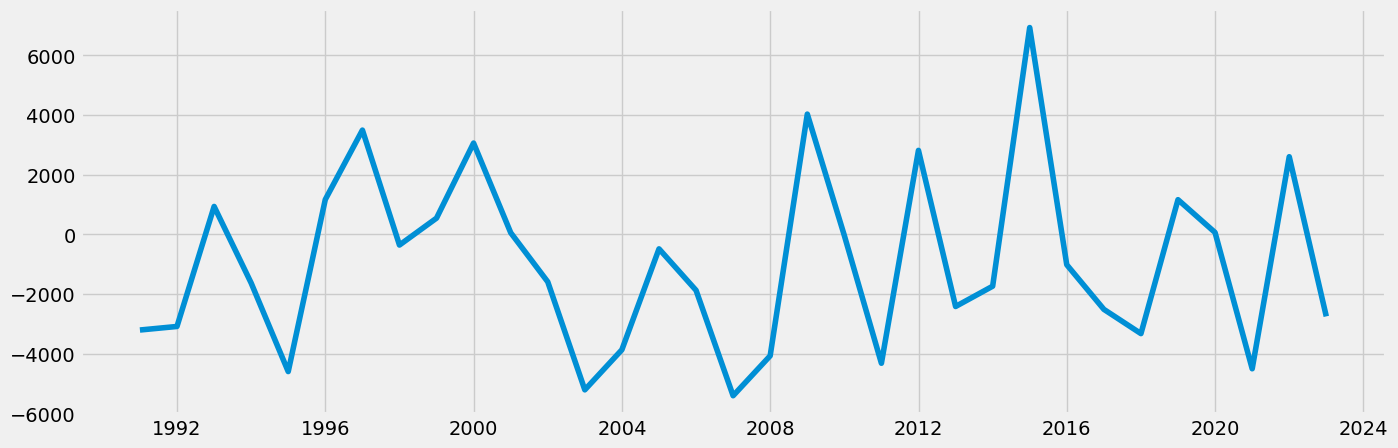

In [113]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [114]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.495472
p-value                         0.008104
Number of Lags Used             7.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


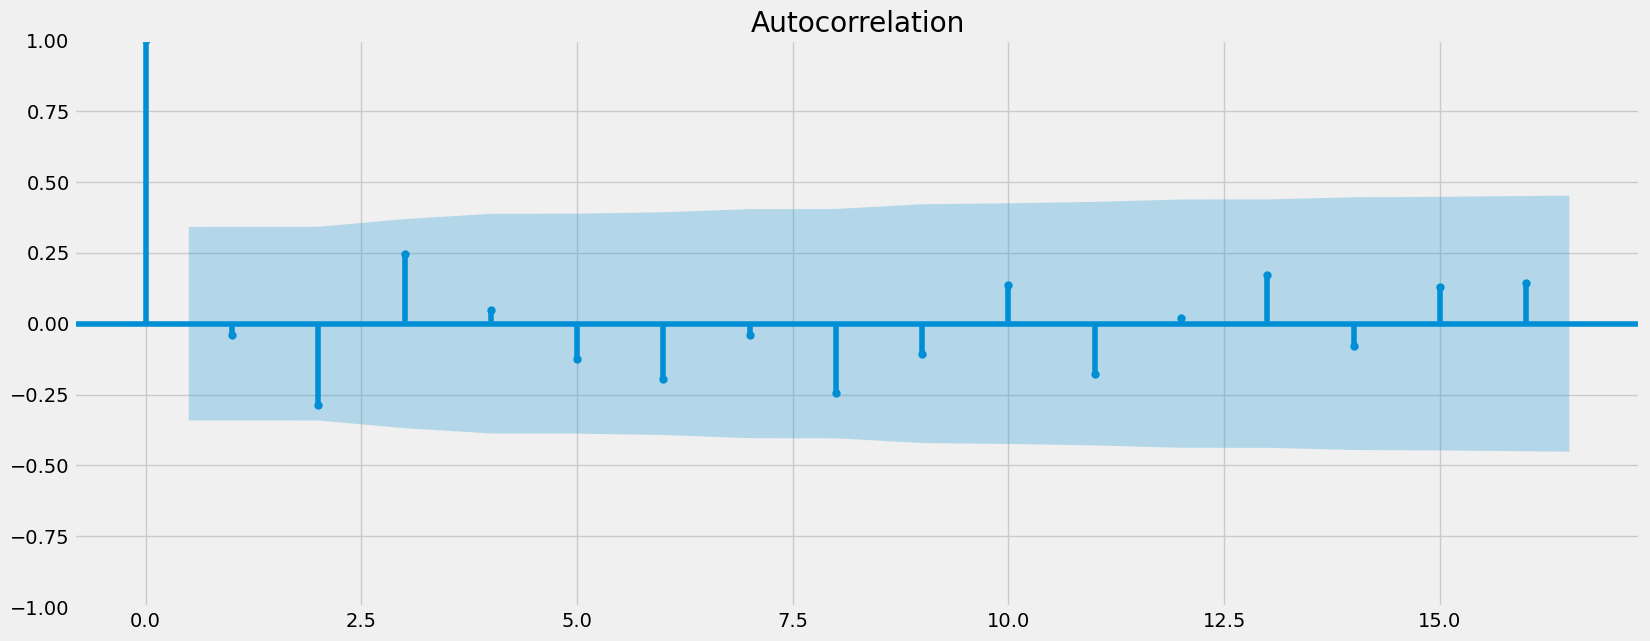

In [115]:
plot_acf(data_diff)
plt.show()

#### after stationarizing the data the test statistic is now smaller tha the critical value at both the five and ten percent significance levels
#### and the p-value is lover than 0.05. We can consider the series stationary

## Bonus Task Forecasting
### stuck on one error and couldn't finish it

In [95]:
data_diff.head(50)

value
datetime            
2021-12-31  2601.613
2020-12-31 -4502.329
2019-12-31    63.516
2018-12-31  1162.206
2017-12-31 -3324.203
2016-12-31 -2512.637
2015-12-31 -1016.974
2014-12-31  6928.580
2013-12-31 -1736.431
2012-12-31 -2415.978
2011-12-31  2813.983
2010-12-31 -4317.666
2009-12-31   -40.997
2008-12-31  4029.146
2007-12-31 -4067.997
2006-12-31 -5405.394
2005-12-31 -1874.271
2004-12-31  -485.383
2003-12-31 -3865.965
2002-12-31 -5208.515
2001-12-31 -1590.561
2000-12-31    55.103
1999-12-31  3059.367
1998-12-31   543.915
1997-12-31  -357.411
1996-12-31  3493.552
1995-12-31  1165.311
1994-12-31 -4596.061
1993-12-31 -1630.588
1992-12-31   935.082
1991-12-31 -3084.980
1990-12-31 -3203.925

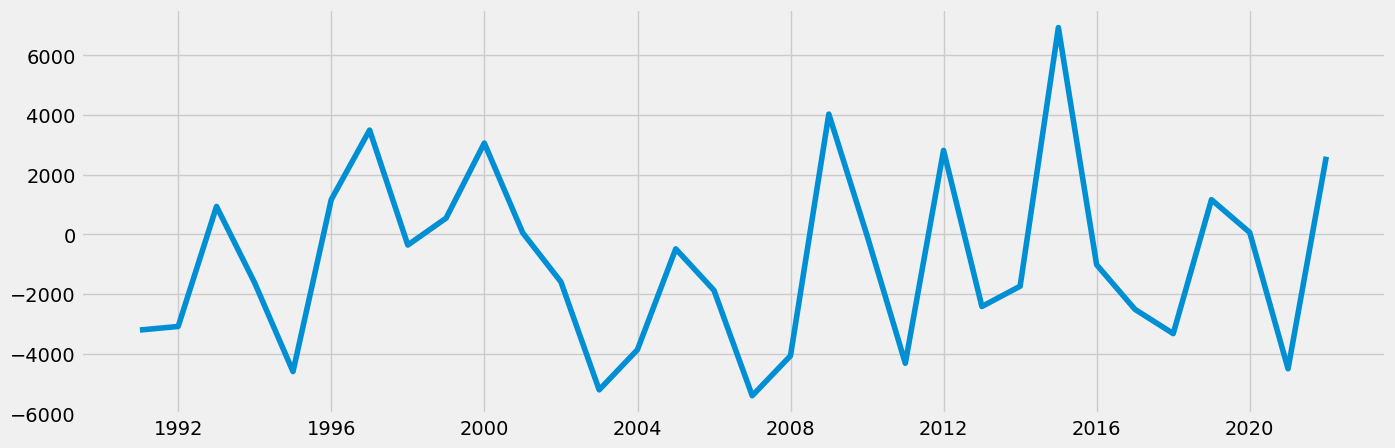

In [75]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [76]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.714689
p-value                         0.003911
Number of Lags Used             7.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


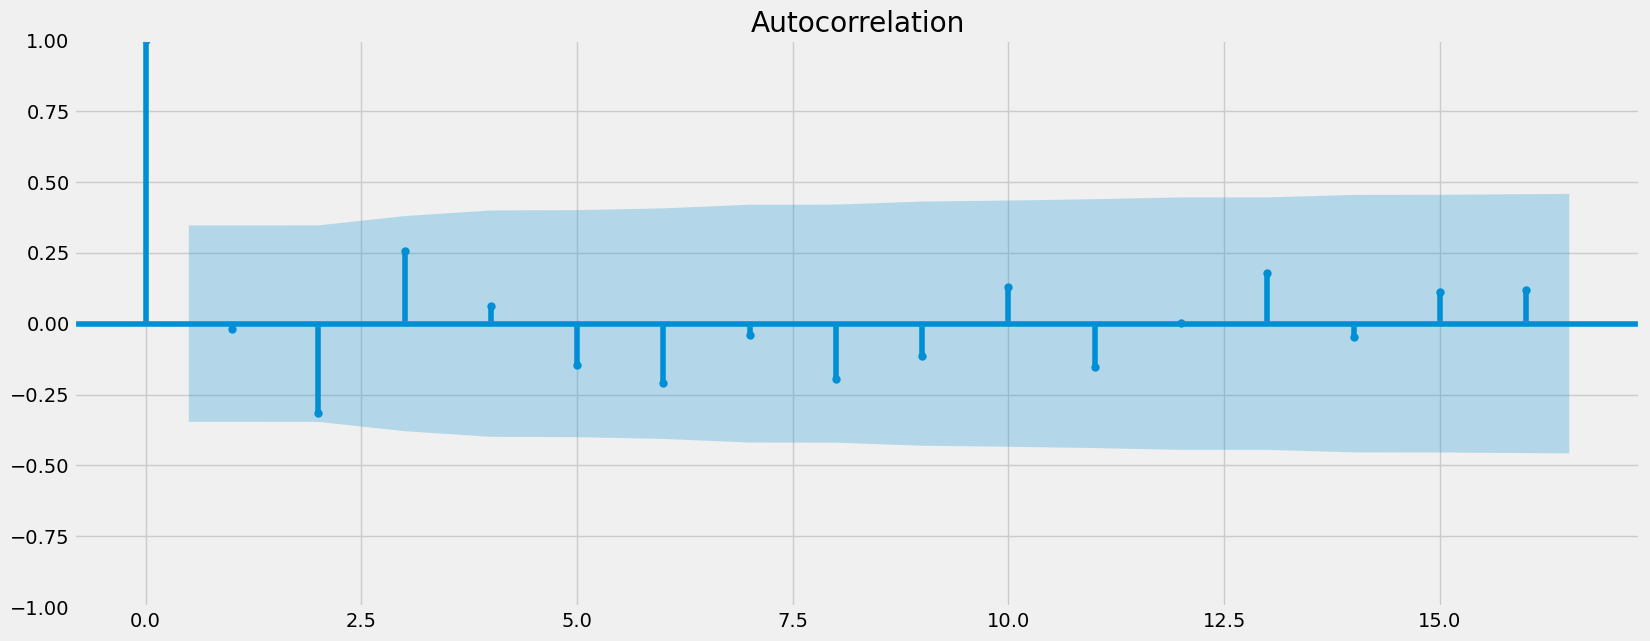

In [77]:
plot_acf(data_diff)
plt.show()

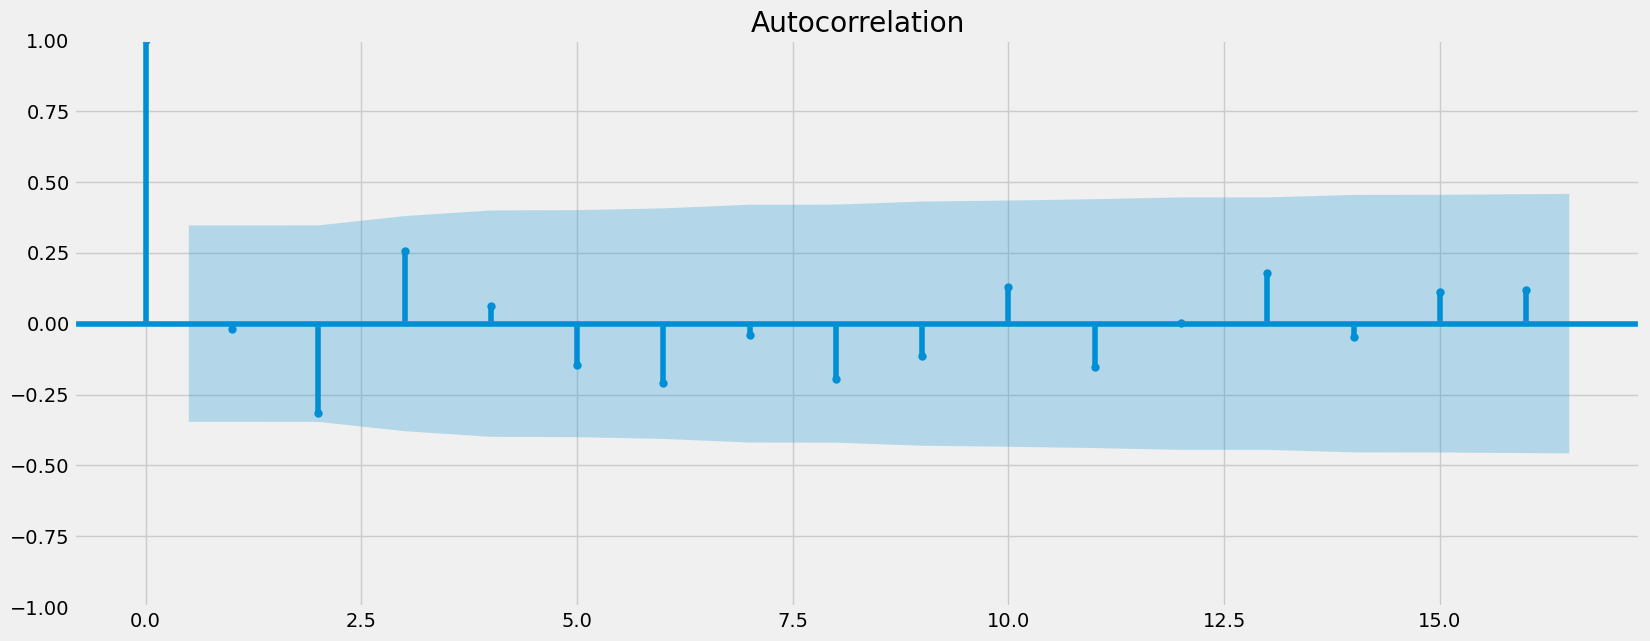

<Figure size 1500x500 with 0 Axes>

In [78]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

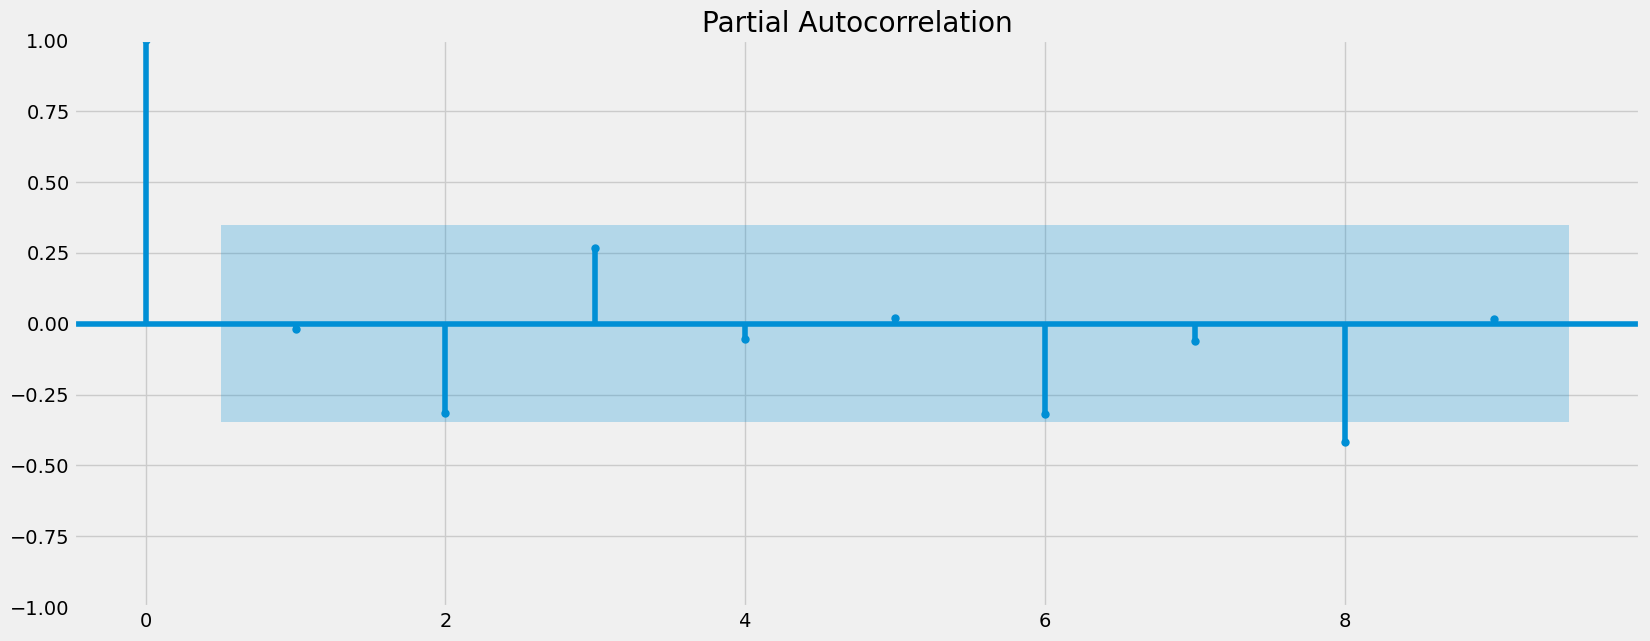

<Figure size 4500x4500 with 0 Axes>

In [87]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff, lags = 9)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

In [79]:
# Split the data

train = data_diff['value'][7:]
test = data_diff['value'][:8]

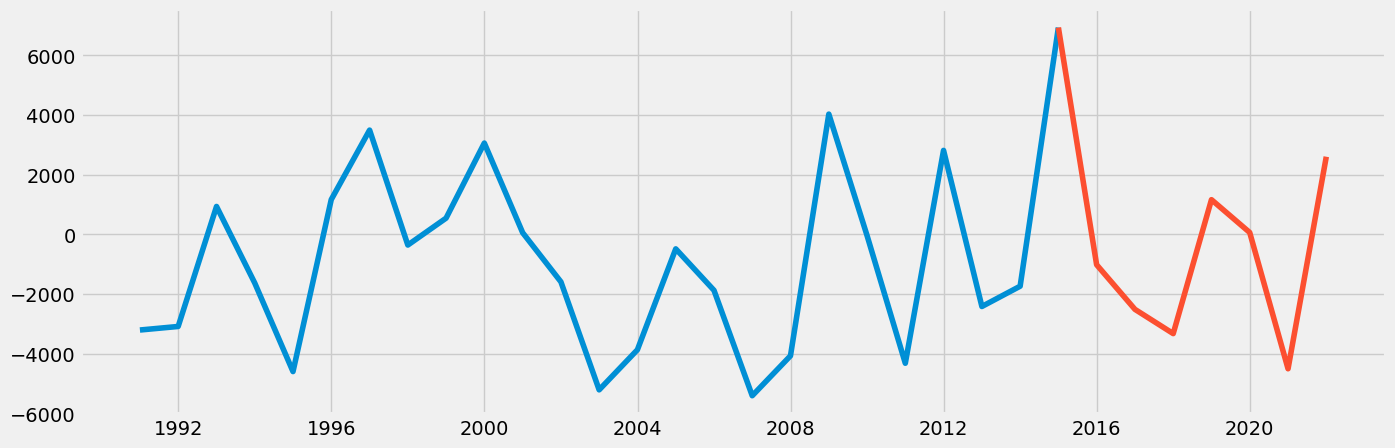

In [80]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [81]:
test.shape

(8,)

### run and fit model

In [82]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [83]:
from statsmodels.tsa.arima_model import ARMA

In [89]:
type(test.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [98]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(8, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -227.599
Date:                Sat, 20 Apr 2024   AIC                            461.198
Time:                        01:33:07   BIC                            464.732
Sample:                             0   HQIC                           462.136
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1397      0.237      0.589      0.556      -0.325       0.605
ma.L1         -0.9995      0.432     -2.313      0.021      -1.847      -0.152
sigma2      9.201e+06   4.72e-08   1.95e+14      0.0

ValueError: too many values to unpack (expected 3)